In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
digits = datasets.load_digits()
digits

{'DESCR': " Optical Recognition of Handwritten Digits Data Set\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each block. This generates\nan input ma

In [3]:
images_and_labels = list(zip(digits.images,digits.target))

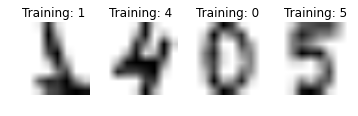

In [4]:
for index, (image,label) in enumerate(images_and_labels[1000:1004]):
    plt.subplot(2,4,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r)
    plt.title("Training: %i" % label)

In [5]:
from sklearn import neighbors

In [6]:
n_samples = digits.images.shape[0]
data      = digits.images.reshape( (n_samples,-1) )
labels    = digits.target

In [7]:
shuff_idx = np.random.permutation(n_samples)
train_idx = shuff_idx[:1600]
test_idx  = shuff_idx[1601:]

In [8]:
X_train = data[train_idx,:]
X_test  = data[test_idx, :]

Y_train = labels[train_idx]
Y_test  = labels[test_idx]


In [9]:
knn = neighbors.KNeighborsClassifier()

In [10]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [11]:
np.sum(knn.predict(X_test) == Y_test) / np.float64( Y_test.shape)

array([ 0.98979592])

In [21]:
knn.score(X_test,Y_test)

0.98979591836734693

In [26]:
false_idx = np.where( knn.predict(X_test) != Y_test )
false_idx

(array([ 29, 132]),)

In [27]:
knn.score( np.delete(X_test,false_idx,0), np.delete( Y_test,false_idx) )

1.0

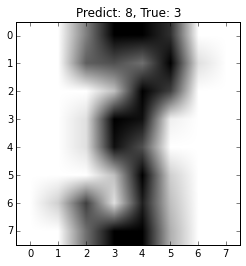

In [32]:
badIdx = 29
plt.imshow(X_test[badIdx,:].reshape([8,8]),cmap=plt.cm.gray_r)
plt.title("Predict: %i, True: %i" % (knn.predict(X_test[badIdx,:]), Y_test[badIdx]) ) 